Grupo:

- Gustavo Losch do Amaral
- Henrique Ramos Mayer
- Rian Cordoni da Veiga

# Lidando com Valores Ausentes na biblioteca pandas

**Valores Ausentes** ocorrem quando não foram informados valores para certas variáveis em um dataset. É comum ocorrer quando utilizamos dados reais.

O que é um valor ausente para o Pandas?
* None (Nativo do Python)
* NaN (Not a Number): constante da biblioteca Numpy

Neste notebook vamos aprender algumas maneiras de lidar com valores ausentes.

Link para a documentação do Pandas sobre missing data: https://pandas.pydata.org/docs/user_guide/missing_data.html

## Instalação e Importação da biblioteca pandas

Antes de rodar este notebook, garanta que a biblioteca abaixo estejam instaladas em seu ambiente:

In [2]:
import pandas as pd
import seaborn as sns

## Criação do dataframe e análise inicial dos dados

Nosso dataset de testes será o `titanic.csv`, um dataset bastante famoso em ciência de dados. Esse dataset contém as seguintes informações sobre os passageiros do Titanic:

* `PassengerId` = ID do passageiro do navio (chave primária).
* `Pclass	` = Tipo de classe de passagem (valor numérico entre 1 e 3), sendo 1 a melhor classe e 3 a pior classe.
* `Name` = Nome do passageiro
* `Sex` = Gênero do passageiro, com valores male/female.
* `Age` = Idade do passageiro na data da ocorrência do naufrágio (em anos).
* `SibSp` = Número de irmãos / cônjuges a bordo.
* `Parch` = Número de pais / filhos a bordo.
* `Ticket` = Número do ticket.
* `Fare` = Valor da passagem.
* `Cabin` = Código de identificação da Cabine.
* `Embarked` = Porto ondem o passageiro embarcou no navio. (C = Cherbourg, Q = Queenstown, S = Southampton)
* `survived` = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.


In [3]:
# Carrega o dataset
dados = pd.read_csv('titanic.csv')

# Exibe as primeiras linhas do dataset
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Outra forma de observar os dados do dataset é com a função sample
dados.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S
590,591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S


Podemos obter algumas estatísticas sobre os dados usando a função `describe`

In [5]:
dados.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Exercício 1**: Com a execução da célula anterior, podemos notar que o atributo `Age` possui um valor máximo de 80. Esse valor pode ser considerado um outlier? Como você poderia justificar sua afirmação (com base no dataset e com base em informações externas)?

## Identificando valores ausentes

<Axes: ylabel='Age'>

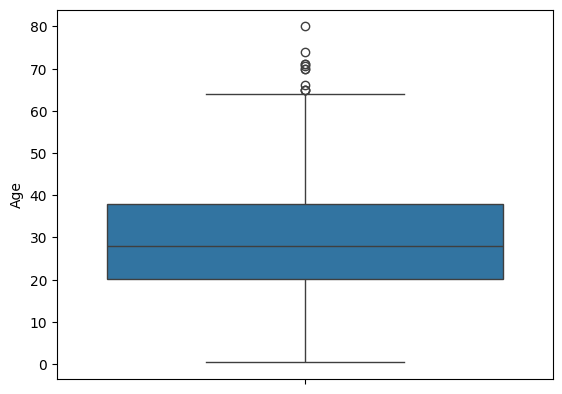

In [6]:
import seaborn as sns

sns.boxplot(data=dados['Age'])

**Resposta do Exercício 1:**


Sim, o valor pode ser considerado um outlier. Considerando o contexto do dataset, em 1912 (ano em que o acidente ocorreu), a expectativa de vida na Inglaterra era de 55 anos, sendo assim, contextualmente uma pessoa de 80 anos pode ser considerada um outlier. Do ponto de vista matemático, também pode ser considerado outlier. Para calcular um outlier, precisa-se verificar se o valor está abaixo de `Q1 - 1,5 * IQR` ou se o valor está acima de `Q3 + 1,5 * IQR`, sendo `Q1` o valor que divide o primeiro quartil, `Q3` o valor que divide o terceiro quartil e `IQR` sendo o Intervalo Interquartil, dado por `IQR = Q3 - Q1`.

Utilizando uma vizualização boxplot, pode-se verificar que o valor 80 é considerado um outlier.

A função `isnull()` retorna verdadeiro se um valor em uma posição do dataframe é vazio

In [7]:
dados['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

Podemos obter a contagem de valores nulos em cada coluna em um novo dataframe

In [8]:
contagem_nulos = dados.isnull().sum()
contagem_nulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Exclusão de Registros com dados faltantes

Uma forma de lidar com valores ausentes é excluir do dataframe as linhas que possuem valores ausentes. Isso pode ser feito facilmente através da função `dropna`. Essa função retorna um dataset sem as linhas que possuem algum valor ausente


In [9]:
contagem_nulos = dados.isnull().values.sum()

In [10]:
sem_nulos = dados.dropna()

**EXERCÍCIO 2**: Quantos registros foram excluídos do dataset?

**Resposta do Exercício 2:**

Foram excluídos 866 registros do dataset. Foi possível obter o número de registros excluídos contando a soma da quantidade de valores nulos antes de excluir do dataset e verificando se após a operação ainda exite algum valor nulo.

In [11]:
print("Valores faltantes excluidos:", contagem_nulos)
print("Valores nulos após a operação:", sem_nulos.isnull().values.sum())

Valores faltantes excluidos: 866
Valores nulos após a operação: 0


**EXERCÍCIO 3**: Pode-se também excluir do dataset as colunas que contém valores faltantes. Para isso deve-se informar o parâmetro `axis=1` para a função `dropna`. Teste essa função e verifique quantas colunas foram excluídas do dataframe.

**Resposta do Exercicio 3:**

Foram excluídas 3 colunas do dataset. Existiam 3 colunas com valores faltantes.

In [12]:
sem_colunasnulas = dados.dropna(axis=1)

In [13]:
print("Com colunas com valores nulos:", len(dados.columns.values))
print("Sem colunas com valores nulos", len(sem_colunasnulas.columns.values))
print(len(dados.columns.values)-len(sem_colunasnulas.columns.values))

Com colunas com valores nulos: 12
Sem colunas com valores nulos 9
3


## Inputação de Dados

### Substituição Dummy

Outra forma de lidar com valores ausentes é preencher os valores faltantes com um valor padrão. A função `fillna(valor)` pode ser utilizada para realizar esta tarefa.

*Tome cuidado*: a função `fillna` preenche todo o dataframe de uma vez


In [14]:
# Preenchendo todos os dados faltantes com 0
preenchido = dados.fillna(0)

In [15]:
preenchido

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
# Note que não teremos mais valores nulos no dataset
contagem_nulos = preenchido.isnull().sum()
contagem_nulos

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Substituição pela Média / Item Frequente

In [17]:
dados_teste = {
    "Produto": ["A", "B", "C", "D"],
    "Quantidade": [10, None, 15, 20],
    "Preco": [100, 200, None, 100]
}

df_vendas = pd.DataFrame(dados_teste)
df_vendas

,Produto,Quantidade,Preco
0,A,10.0,100.0
1,B,NaN,200.0
2,C,15.0,NaN
3,D,20.0,100.0


In [18]:
# Definindo o valor padrão -1 para a coluna quantidade
df_vendas.fillna({"Quantidade": -1}, inplace=True) ## inplace=True faz com que a operação seja realizada na própria variável

# Obtendo a moda do atributo preço
moda_preco = df_vendas["Preco"].mode()[0]
df_vendas.fillna({'Preco': moda_preco}, inplace=True)

df_vendas

,Produto,Quantidade,Preco
0,A,10.0,100.0
1,B,-1.0,200.0
2,C,15.0,100.0
3,D,20.0,100.0


**EXERCÍCIO 4**: Preencha os dados ausentes do dataset Titanic da seguinte forma:
* Atribua o valor ‘A101’ para as cabines faltantes
* Preencha o atributo idade com o valor médio das idades dos passageiros


**Resposta do Exercício 4:**

Foram atribuidos aos valores faltantes da coluna `Cabin` o valor `A101` e aos dados faltantes da coluna `Age`, foi atribuído o valor médio arredondado das idades (`29,7`).

In [19]:
ex4 = dados.copy()
media_idade = round(ex4["Age"].mean(),1)
ex4 = ex4.fillna({"Cabin": "A101",
                    "Age": media_idade})

In [20]:
ex4.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

É possível também usar os valores que estão nas linhas vizinhas para completar os valores faltantes.

**EXERCÍCIO 5**: Procure na documentação da função `fillna` quais as configurações possíveis para o atributo `method`. Crie um exemplo que use esse método para preencher os valores da coluna `Cabin`. Confira o resultado para ver se ele fica conforme o esperado.

In [21]:
ex5 = dados.copy()
ex5["Cabin"] = ex5["Cabin"].fillna(method="ffill", inplace=False)

/var/folders/y7/h9b651_1543gvb5qx83kjqg40000gn/T/ipykernel_36236/3184866635.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ex5["Cabin"] = ex5["Cabin"].fillna(method="ffill", inplace=False)


In [22]:
dados["Cabin"].isnull().head(6)

0     True
1    False
2     True
3    False
4     True
5     True
Name: Cabin, dtype: bool

In [23]:
ex5["Cabin"].head(6)

0     NaN
1     C85
2     C85
3    C123
4    C123
5    C123
Name: Cabin, dtype: object

**Resposta do Exercício 5:**

Foi utilizado o método `ffil` para imputar os dados na coluna `Cabin`. O método `ffill` utiliza o último valor não nulo para preencher os valores nulos. Percebe-se que o resultado está correto quando se compara o índice dos valores nulos do dataframe original com os valores do dataframe com os dados imputados.

In [24]:
ex5.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,C123,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,E46,C


### Substituição por Interpolação

In [25]:
res = dados["Age"].interpolate(method="linear")

for antigo, novo in zip(dados["Age"], res):
    print(antigo, novo)

22.0 22.0
38.0 38.0
26.0 26.0
35.0 35.0
35.0 35.0
nan 44.5
54.0 54.0
2.0 2.0
27.0 27.0
14.0 14.0
4.0 4.0
58.0 58.0
20.0 20.0
39.0 39.0
14.0 14.0
55.0 55.0
2.0 2.0
nan 16.5
31.0 31.0
nan 33.0
35.0 35.0
34.0 34.0
15.0 15.0
28.0 28.0
8.0 8.0
38.0 38.0
nan 28.5
19.0 19.0
nan 26.0
nan 33.0
40.0 40.0
nan 48.666666666666664
nan 57.33333333333333
66.0 66.0
28.0 28.0
42.0 42.0
nan 31.5
21.0 21.0
18.0 18.0
14.0 14.0
40.0 40.0
27.0 27.0
nan 15.0
3.0 3.0
19.0 19.0
nan 18.8
nan 18.6
nan 18.4
nan 18.2
18.0 18.0
7.0 7.0
21.0 21.0
49.0 49.0
29.0 29.0
65.0 65.0
nan 43.0
21.0 21.0
28.5 28.5
5.0 5.0
11.0 11.0
22.0 22.0
38.0 38.0
45.0 45.0
4.0 4.0
nan 12.333333333333334
nan 20.666666666666668
29.0 29.0
19.0 19.0
17.0 17.0
26.0 26.0
32.0 32.0
16.0 16.0
21.0 21.0
26.0 26.0
32.0 32.0
25.0 25.0
nan 16.943333333333335
nan 8.886666666666667
0.83 0.83
30.0 30.0
22.0 22.0
29.0 29.0
nan 28.5
28.0 28.0
17.0 17.0
33.0 33.0
16.0 16.0
nan 19.5
23.0 23.0
24.0 24.0
29.0 29.0
20.0 20.0
46.0 46.0
26.0 26.0
59.0 59.0
nan 6

**Exercício 6**: Faz sentido utilizar interpolação para imputar valores para o atributo idade do dataset de testes? Em que casos isso faz mais sentido?

**Resposta do Exercício 6:**

Não faz sentido utilizar interpolação para imputar valores para o atributo `Age` do dataset. Imputação por interpolação leva em consideração os valores vizinhos ao valores nulos, portanto, o que define a idade de uma pessoa no conjunto de dados não está nada relacionado à idade de pessoas anteriores ou posteriores presentes no dataset. Interpolação matemática faz mais sentido quando há uma relação entre os diferentes registros de uma mesma coluna, como acontece, por exemplo, em uma série temporal. Se o dataset estivesse ordenado pelo atributo `Age`, talvez a interpolação fosse um bom método para imputação.